In [1]:
!pwd

/content


In [3]:
!curl -L -o /content/colorectal-cancer-global-dataset-and-predictions.zip\
  https://www.kaggle.com/api/v1/datasets/download/ankushpanday2/colorectal-cancer-global-dataset-and-predictions

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4021k  100 4021k    0     0  7794k      0 --:--:-- --:--:-- --:--:-- 7794k


In [5]:
!unzip /content/colorectal-cancer-global-dataset-and-predictions.zip -d /content/data/

Archive:  /content/colorectal-cancer-global-dataset-and-predictions.zip
  inflating: /content/data/colorectal_cancer_dataset.csv  


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv('/content/data/colorectal_cancer_dataset.csv')
data.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [9]:
data.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

In [10]:
data.isnull().sum()

,0
Patient_ID,0
Country,0
Age,0
Gender,0
Cancer_Stage,0
Tumor_Size_mm,0
Family_History,0
Smoking_History,0
Alcohol_Consumption,0
Obesity_BMI,0


<Axes: ylabel='Country'>

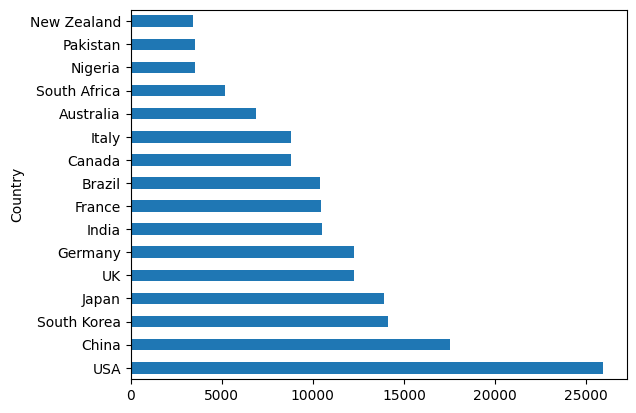

In [20]:
data['Country'].value_counts().plot.barh()

In [29]:
data['Gender'].value_counts()

,count
Gender,
M,100686
F,66811


<Axes: xlabel='Gender', ylabel='Age'>

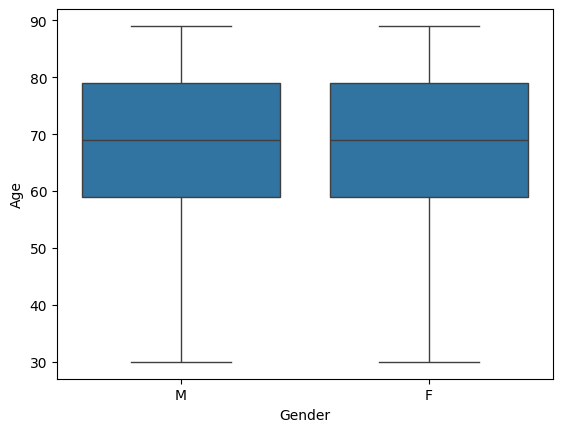

In [28]:
sns.boxplot(x = 'Gender', y='Age', data=data,)

In [32]:
num_cols = [i for i in data.columns if data[i].dtype!='O']
cat_cols = [i for i in data.columns if data[i].dtype=='O']

In [41]:
def cat_plots(cat_cols):
  fig, axes = plt.subplots(len(cat_cols), 2, figsize = (15, len(cat_cols)*5))
  for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, ax=axes[i][0])
    axes[i][0].set_title(f"Countplot for {col}")

    sns.countplot(data=data, x=col, ax=axes[i][1], hue='Gender', palette='Set2')
    axes[i][1].set_title(f"Countplot for {col} against gender")


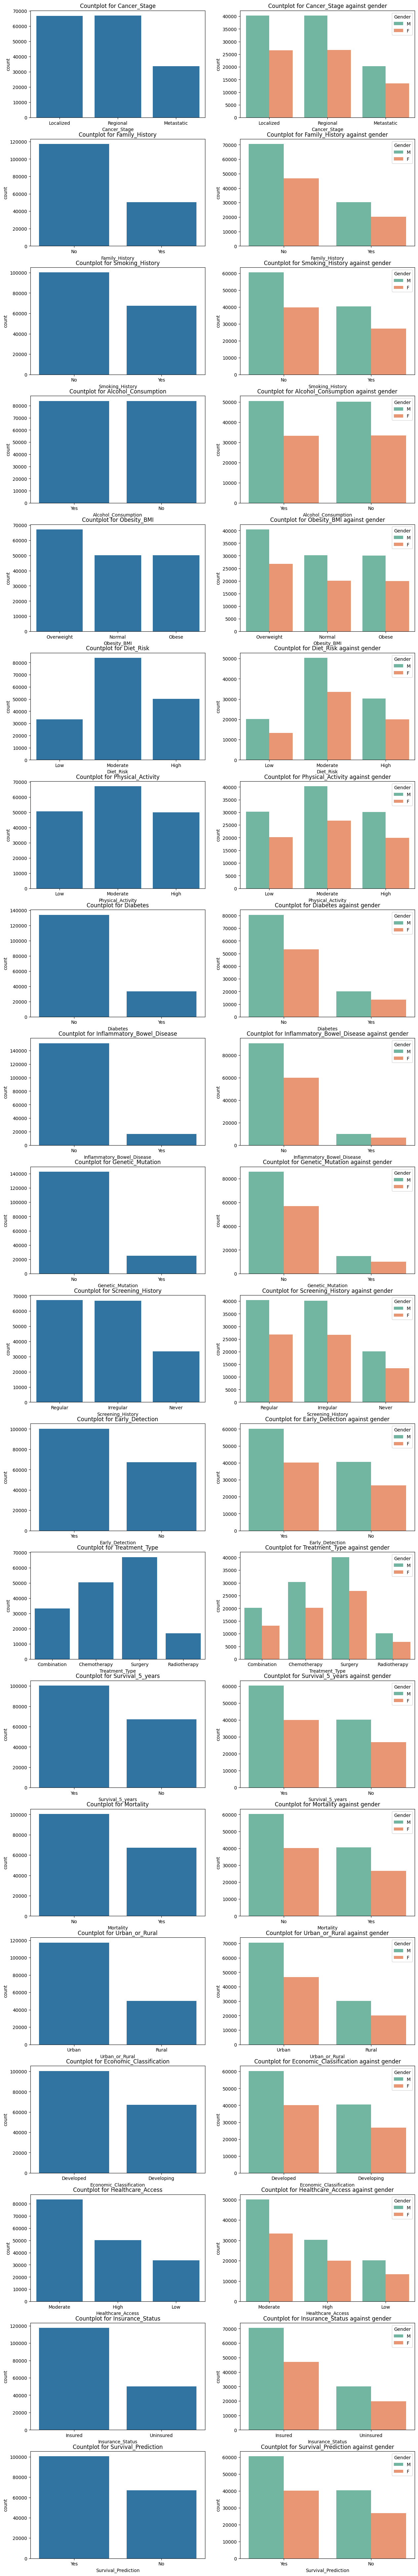

In [42]:
#cat_cols.remove('Country')
#cat_cols.remove('Gender')
cat_plots(cat_cols)

/tmp/ipython-input-2572028053.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x = 'Cancer_Stage', y = 'Tumor_Size_mm', palette='coolwarm')


<Axes: xlabel='Cancer_Stage', ylabel='Tumor_Size_mm'>

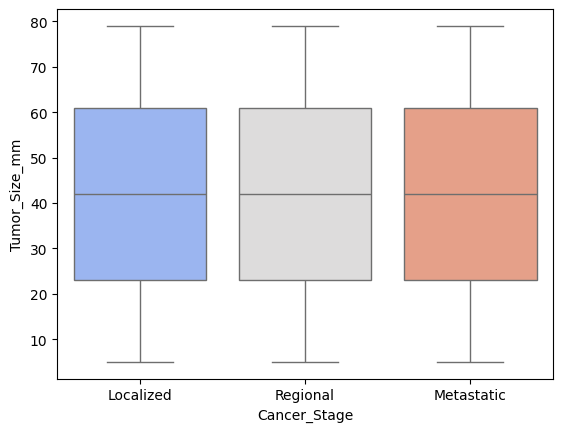

In [50]:
sns.boxplot(data=data, x = 'Cancer_Stage', y = 'Tumor_Size_mm', palette='coolwarm')

In [43]:
data.duplicated().sum()

np.int64(0)

In [45]:
data.shape

(167497, 28)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [47]:
num_cols = [i for i in data.columns if data[i].dtype!='O']
cat_cols = [i for i in data.columns if data[i].dtype=='O']

In [48]:
print(num_cols)
print(cat_cols)

['Patient_ID', 'Age', 'Tumor_Size_mm', 'Healthcare_Costs', 'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K']
['Country', 'Gender', 'Cancer_Stage', 'Family_History', 'Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity', 'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation', 'Screening_History', 'Early_Detection', 'Treatment_Type', 'Survival_5_years', 'Mortality', 'Urban_or_Rural', 'Economic_Classification', 'Healthcare_Access', 'Insurance_Status', 'Survival_Prediction']


In [49]:
data.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


In [52]:
df = data.drop('Patient_ID', axis=1)

In [57]:
x = df.drop('Survival_Prediction', axis=1)
y = df['Survival_Prediction']

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mappings = {}
# cat_cols.remove('Survival_Prediction')
for i in cat_cols:
  x[i] = le.fit_transform(x[i])
  mappings[i] = {label: code for label,code in zip(le.classes_, le.transform(le.classes_))}

In [62]:
for i,j in mappings.items():
  print(i,j)
  print()

Country {'Australia': np.int64(0), 'Brazil': np.int64(1), 'Canada': np.int64(2), 'China': np.int64(3), 'France': np.int64(4), 'Germany': np.int64(5), 'India': np.int64(6), 'Italy': np.int64(7), 'Japan': np.int64(8), 'New Zealand': np.int64(9), 'Nigeria': np.int64(10), 'Pakistan': np.int64(11), 'South Africa': np.int64(12), 'South Korea': np.int64(13), 'UK': np.int64(14), 'USA': np.int64(15)}

Gender {'F': np.int64(0), 'M': np.int64(1)}

Cancer_Stage {'Localized': np.int64(0), 'Metastatic': np.int64(1), 'Regional': np.int64(2)}

Family_History {'No': np.int64(0), 'Yes': np.int64(1)}

Smoking_History {'No': np.int64(0), 'Yes': np.int64(1)}

Alcohol_Consumption {'No': np.int64(0), 'Yes': np.int64(1)}

Obesity_BMI {'Normal': np.int64(0), 'Obese': np.int64(1), 'Overweight': np.int64(2)}

Diet_Risk {'High': np.int64(0), 'Low': np.int64(1), 'Moderate': np.int64(2)}

Physical_Activity {'High': np.int64(0), 'Low': np.int64(1), 'Moderate': np.int64(2)}

Diabetes {'No': np.int64(0), 'Yes': np.int

In [63]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Country                     167497 non-null  int64
 1   Age                         167497 non-null  int64
 2   Gender                      167497 non-null  int64
 3   Cancer_Stage                167497 non-null  int64
 4   Tumor_Size_mm               167497 non-null  int64
 5   Family_History              167497 non-null  int64
 6   Smoking_History             167497 non-null  int64
 7   Alcohol_Consumption         167497 non-null  int64
 8   Obesity_BMI                 167497 non-null  int64
 9   Diet_Risk                   167497 non-null  int64
 10  Physical_Activity           167497 non-null  int64
 11  Diabetes                    167497 non-null  int64
 12  Inflammatory_Bowel_Disease  167497 non-null  int64
 13  Genetic_Mutation            167497 non-null 

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [66]:
from sklearn.feature_selection import chi2, SelectKBest

x_cat = x_train.select_dtypes(['int64', 'float64'])
chi_selector = SelectKBest(score_func = chi2, k='all')
chi_selector.fit(x_cat,y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x7e16fc7e1760>)

In [68]:
features = pd.DataFrame({
    'Features': x_cat.columns,
    'Score': chi_selector.scores_
}).sort_values('Score', ascending=False)

In [69]:
features

,Features,Score
19,Healthcare_Costs,2097.430133
4,Tumor_Size_mm,7.971461
16,Treatment_Type,4.987144
11,Diabetes,2.103967
21,Mortality_Rate_per_100K,1.963077
25,Insurance_Status,1.464241
3,Cancer_Stage,1.281849
14,Screening_History,1.159519
0,Country,0.883425
24,Healthcare_Access,0.713346


In [71]:
top_features = features.head(8)['Features'].tolist()

In [72]:
top_features

['Healthcare_Costs',
 'Tumor_Size_mm',
 'Treatment_Type',
 'Diabetes',
 'Mortality_Rate_per_100K',
 'Insurance_Status',
 'Cancer_Stage',
 'Screening_History']

In [73]:
x = x[top_features]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42, stratify=y)

In [78]:
x_train.shape

(133997, 8)

In [79]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gd = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,max_depth=3, random_state=42)

In [82]:
gd.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [83]:
y_pred = gd.predict(x_test)

In [86]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

acc = accuracy_score(y_test, y_pred)

In [85]:
acc

0.5995820895522388

In [87]:
report = classification_report(y_test, y_pred)

In [88]:
print(report)

              precision    recall  f1-score   support

          No       0.46      0.00      0.00     13412
         Yes       0.60      1.00      0.75     20088

    accuracy                           0.60     33500
   macro avg       0.53      0.50      0.38     33500
weighted avg       0.54      0.60      0.45     33500



In [89]:
y_proba = gd.predict_proba(x_test)[:, 1] if (len(y.unique())==2) else None
roc_auc = roc_auc_score(y_test, y_proba)

In [90]:
roc_auc

np.float64(0.4988399962770431)